# 1. Unsupervised learning - Clustering

<img src="https://cdn-images-1.medium.com/freeze/max/1000/0*OgoKv1eEw3kl4bWQ.jpg?q=20" />
<img src="https://lh3.googleusercontent.com/DS4BHTkXT_9FzxuOd67PNjJT-o87kdtvP42wq_JUzQz8oWhzOOxWKu0CAkTSzBzyLKrYNWAF8dAY6FUSgjLJFBBrMjHz_cdk9-i0QhAOnIdo8Nq3192BdGxlEUwRRpCzkp_iBiIK" width="600"/>

<img src="https://miro.medium.com/max/694/1*5RDVF1xW0LfXjoxZp6jI1Q.png" />

## Kmeans clustering

**Kmeans** is one of the most popular **clustering** algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster’s centroid than any other centroid. K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg" width="300"/>

**The Kmeans algorithm**
1.  Select `K` random starting cluster centroids
2.  Compute the distance between each observation and the clusters
3.  Reassign a cluster to each observation and then recompute the centroids
4.  Keep doing so until the labels stay constant and we no longer need to reassign


Voronoi diagram: 
- http://paperjs.org/examples/voronoi/
- http://www.raymondhill.net/voronoi/rhill-voronoi.html




## Other Clustering algorithms

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png" />

### Example: Bakery dataset  in sklearn

- https://github.com/boyander/datamad-1019/blob/master/w7-d4-unsupervised-pipeline/w7-d4-unsupervised-learning.ipynb

In [1]:
import pandas as pd
breadbasket = pd.read_csv('data/BreadBasket_DMS.csv')
breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [2]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket.Date + ' ' + breadbasket.Time)


In [3]:
prods = breadbasket.Item.unique()
print(prods)
print(len(prods))

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

In [4]:
breadbasket.Item.value_counts().head()


Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

In [5]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

def chooseCat(prod):
    for groupName, groupItems in groups.items():
        if prod in groupItems:
            return groupName
    return "OTHER_FOOD"

breadbasket["category"] = breadbasket.Item.apply(chooseCat)
breadbasket = pd.get_dummies(breadbasket,columns=["category"],prefix="",prefix_sep="")


In [6]:
breadbasket 

,Date,Time,Transaction,Item,DateTime,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,1,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,0,1,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21289,2017-04-09,14:32:58,9682,Tea,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21290,2017-04-09,14:57:06,9683,Coffee,2017-04-09 14:57:06,0,1,0,0,0,0,0,0,0,0
21291,2017-04-09,14:57:06,9683,Pastry,2017-04-09 14:57:06,0,0,0,0,1,0,0,0,0,0


In [7]:
bread_group1 = breadbasket.groupby(['Transaction','DateTime']).agg({'Item': lambda x: list(x)})
bread_group2 = breadbasket.groupby(['Transaction','DateTime']).sum()
cleandata = pd.concat([bread_group1,bread_group2],axis=1)
cleandata.head()

,,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
Transaction,DateTime,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0


In [8]:
cleandata.reset_index(level=['DateTime'], inplace=True)

In [21]:
cleandata['hour'] = cleandata.DateTime.dt.hour
cleandata['day'] = cleandata.DateTime.dt.dayofweek
display(cleandata.head())

X = cleandata.drop(columns=["DateTime","Item"])
original = X.copy()
display(X)

,DateTime,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label,wd
Transaction,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0,9,6,5,Sunday
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0,10,6,0,Sunday
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0,10,6,0,Sunday
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0,10,6,0,Sunday
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0,10,6,0,Sunday


,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label,wd
Transaction,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6,5,Sunday
2,0,0,2,0,0,0,0,0,0,0,10,6,0,Sunday
3,0,1,0,0,0,1,1,0,0,0,10,6,0,Sunday
4,0,0,0,0,1,0,0,0,0,0,10,6,0,Sunday
5,0,1,1,0,1,0,0,0,0,0,10,6,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,1,0,0,0,0,0,0,0,14,6,6,Sunday
9681,2,1,0,0,0,0,1,0,0,0,14,6,6,Sunday
9682,1,2,0,0,1,0,0,0,0,0,14,6,6,Sunday


In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)

labels = model.fit_predict(X)

cleandata["label"] = labels
cleandata.head()

,DateTime,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0,9,6,5
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0,10,6,0
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0,10,6,0
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0,10,6,0
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0,10,6,0


In [11]:
cleandata.label.value_counts()

0    1865
4    1533
5    1473
2    1451
6    1305
3     967
1     937
Name: label, dtype: int64

In [12]:
import numpy as np
ct = pd.crosstab(cleandata.hour,[cleandata["label"]])
ct.loc[24] = np.zeros(len(ct.columns))

## Rearrange data as normal pastry hours 🚗
superdata = ct.iloc[1:].append(ct.iloc[0:1])
superdata

label,0,1,2,3,4,5,6
hour,,,,,,,
7,0.0,0.0,10.0,0.0,0.0,6.0,0.0
8,0.0,0.0,143.0,0.0,0.0,232.0,0.0
9,0.0,0.0,372.0,0.0,0.0,635.0,0.0
10,225.0,0.0,443.0,0.0,0.0,599.0,0.0
11,962.0,0.0,483.0,0.0,0.0,0.0,0.0
12,678.0,0.0,0.0,0.0,669.0,0.0,0.0
13,0.0,0.0,0.0,0.0,576.0,0.0,587.0
14,0.0,265.0,0.0,0.0,288.0,0.0,577.0
15,0.0,359.0,0.0,424.0,0.0,0.0,141.0


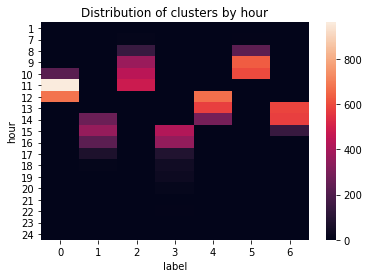

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Distribution of clusters by hour")
sns.heatmap(ct)

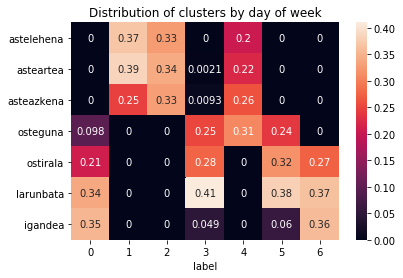

In [14]:
import calendar
import locale

calendar.setfirstweekday(calendar.SUNDAY)
locale.setlocale(locale.LC_ALL, 'eu_ES')

plt.title("Distribution of clusters by day of week")
cleandata["wd"] = cleandata.DateTime.dt.day_name()
ct = pd.crosstab(cleandata.day,cleandata.label, normalize="columns")
ct.index = list(calendar.day_name)
sns.heatmap(ct, annot=True)

In [15]:
edata = cleandata.explode('Item')

a = edata.groupby(['label']).Item.value_counts()
b = a.to_frame("counts").reset_index().set_index("Item")
b.groupby('label').counts.nlargest(5)

label  Item         
0      Coffee           1200
       Bread             702
       Tea               229
       NONE              210
       Pastry            181
1      Coffee            521
       Bread             286
       Tea               216
       Cake              161
       Cookies            86
2      Coffee            955
       Bread             515
       Pastry            229
       Tea               181
       Medialuna         104
3      Coffee            456
       Bread             299
       Tea               196
       Cake              171
       Hot chocolate     101
4      Coffee            790
       Bread             471
       Tea               252
       Sandwich          246
       Cake              169
5      Coffee            802
       Bread             646
       Pastry            237
       Medialuna         187
       Tea               138
6      Coffee            747
       Bread             406
       Sandwich          233
       Tea            

## Unsupervised learning cluster metrics
- **Sillouette score**: How dense the clusters are they and how well separated. CContrasts the average distance to elements in the same cluster with the average distance to elements in other clusters.
  - This score favors convex clusters, for many non convex datasets it will give an artificially low score
  - mean ratio of intra-cluster and nearest-cluster distance
  
<img src="https://image3.slideserve.com/6607494/limitations-of-k-means-non-convex-shapes-l.jpg" width="300"/>

**Note:** A convex polygon is a simple polygon (not self-intersecting) in which no line segment between two points on the boundary ever goes outside the polygon. Equivalently, it is a simple polygon whose interior is a convex set.[1] In a convex polygon, all interior angles are less than or equal to 180 degrees, while in a strictly convex polygon all interior angles are strictly less than 180 degrees.
  
- **Distortion**: Sum of squared distances of samples to their closest cluster center. `KMeans(3).fit(iris.data).intertia_`

**Note:** Smaller `distortion` means more dense clusters.

- **Calinski Harabaz**: The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. `sklearn.metrics.calinski_harabasz_score`


- **T-SNE Plots**: Cluster visualization. Like PCA, embbed N dimensions into 2D space.
    - https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
    - https://www.youtube.com/watch?v=NEaUSP4YerM
    
<img src="https://i.stack.imgur.com/OxEW5.png" width="400"/>



- **Elbow method**: Helps select the optimal number of clusters by fitting the model with a range of values for 𝐾

```python
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
```

In [16]:
print(f"Distortion= {model.inertia_}")

Distortion= 34015.62027225108


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x118b39250>,
         k=None, metric=None, model=None, timings=False)

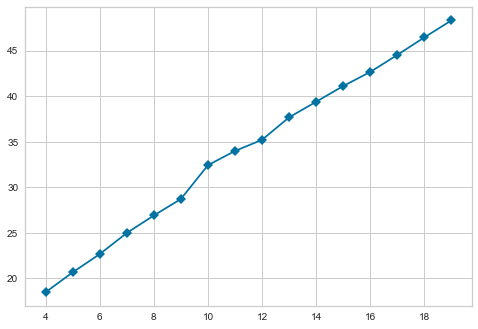

In [17]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20), metric="distortion", timings=False)

visualizer.fit(X)        # Fit the data to the visualizer


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x119cd0890>,
         k=None, metric=None, model=None, timings=False)

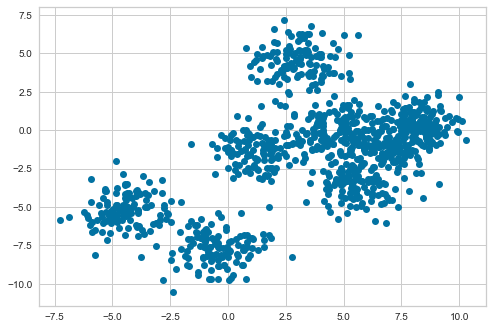

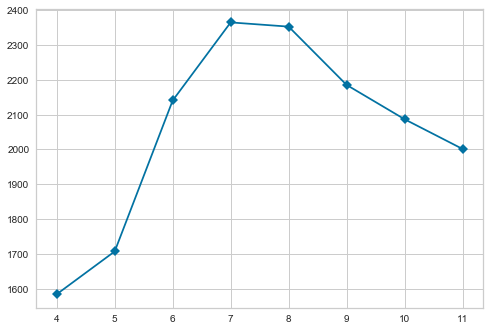

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=2, centers=8)

plt.plot(X[:,0],X[:,1],'o')

plt.figure()
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric="calinski_harabaz", timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer

### Example Bakery dataset  in Apache Spark

- https://github.com/boyander/datamad-1019/blob/master/w7-d5-spark-intro/spark-intro.ipynb

In [28]:
X = original.drop(columns=["wd","label"])
X.head()

,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6
2,0,0,2,0,0,0,0,0,0,0,10,6
3,0,1,0,0,0,1,1,0,0,0,10,6
4,0,0,0,0,1,0,0,0,0,0,10,6
5,0,1,1,0,1,0,0,0,0,0,10,6


In [30]:
# Prepare a SparkContext
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [46]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession

spark = SparkSession(sc)

XX = spark.createDataFrame(X)

vecAssembler = VectorAssembler(inputCols=XX.columns, outputCol="Features")
new_df = vecAssembler.transform(XX)
X = new_df.select('Features')
X.head(5)

[Row(Features=SparseVector(12, {2: 1.0, 10: 9.0, 11: 6.0})),
 Row(Features=SparseVector(12, {2: 2.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {1: 1.0, 5: 1.0, 6: 1.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {4: 1.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {1: 1.0, 2: 1.0, 4: 1.0, 10: 10.0, 11: 6.0}))]

In [49]:
from pyspark.mllib.clustering import KMeans

num_clusters = 7
data = X.rdd.map(lambda x: x[0].toArray()) 
clusters = KMeans.train(data, num_clusters, maxIterations=15, initializationMode="random")

0          1
1          2
2          3
3          4
4          5
        ... 
9526    9680
9527    9681
9528    9682
9529    9683
9530    9684
Name: Transaction, Length: 9531, dtype: int64

In [61]:
import pandas as pd

labeled_spark = original.reset_index()
labeled_spark["label_spark"] = clusters.predict(data).collect()

labeled_spark.head()

,Transaction,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label,wd,label_spark
0,1,0,0,1,0,0,0,0,0,0,0,9,6,5,Sunday,4
1,2,0,0,2,0,0,0,0,0,0,0,10,6,0,Sunday,4
2,3,0,1,0,0,0,1,1,0,0,0,10,6,0,Sunday,4
3,4,0,0,0,0,1,0,0,0,0,0,10,6,0,Sunday,4
4,5,0,1,1,0,1,0,0,0,0,0,10,6,0,Sunday,4


In [65]:
labeled_spark["label_spark"].value_counts()

4    1836
0    1626
6    1311
2    1307
5    1301
1    1263
3     887
Name: label_spark, dtype: int64

# 2. Generative Models - Unsupervised learning

- **Generative GMM:** https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

Articles:
- https://openai.com/blog/generative-models/
- https://towardsdatascience.com/generative-deep-learning-lets-seek-how-ai-extending-not-replacing-creative-
process-fded15b0561b
- https://www.youtube.com/watch?v=G5JT16flZwM&feature=emb_logo
- https://pathmind.com/wiki/generative-adversarial-network-gan

Articles on autoencoders:
- https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b
- https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450